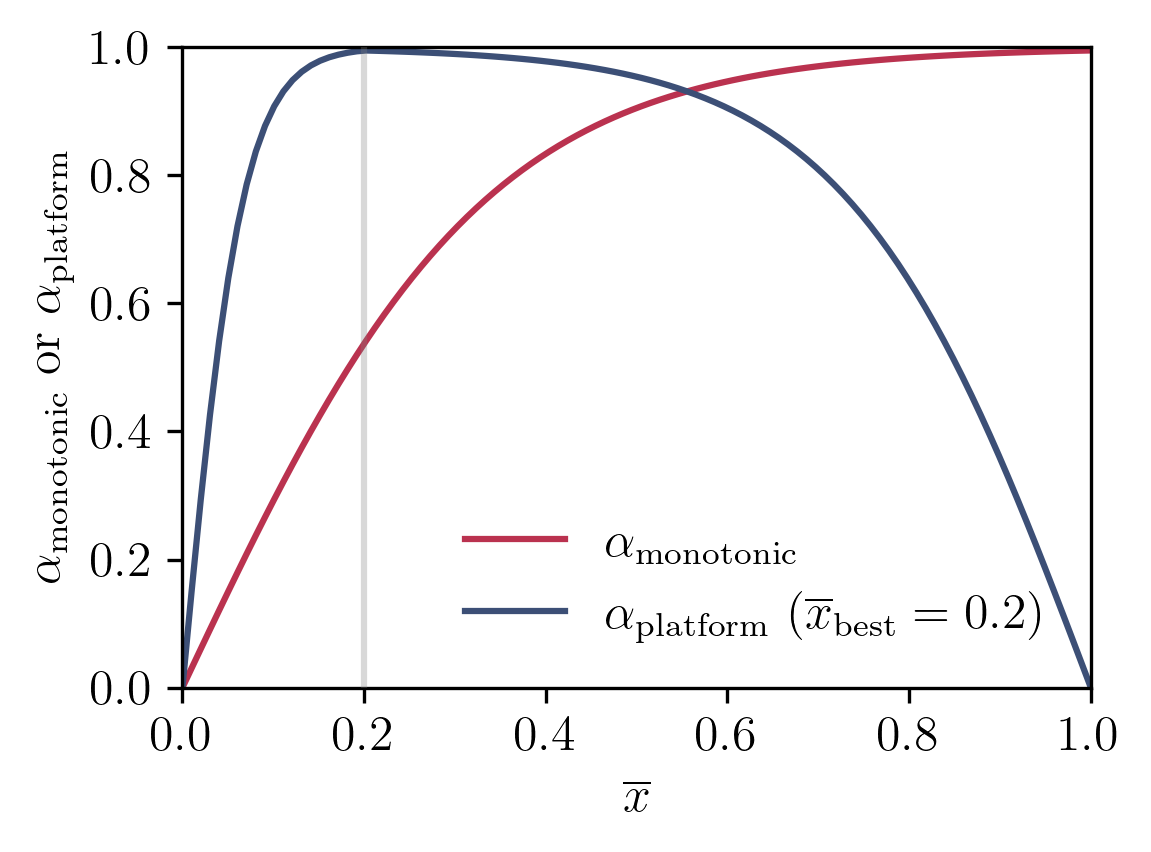

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc("text", usetex=True)
matplotlib.rc("text.latex", preamble=r'\usepackage{amsmath}')
matplotlib.rc("font", family="serif", serif="Times New Roman", size=12)
matplotlib.rc("figure", autolayout=True, figsize=(4,3))

import numpy as np

def monotonic_func(x):
    return np.tanh(3*x)

def platform_func(x, x_best):
    if isinstance(x, np.ndarray):
        res = np.zeros_like(x)
        where_first_stage = x <= x_best
        where_second_stage = x > x_best
        res[where_first_stage] = monotonic_func(x[where_first_stage]/x_best)
        res[where_second_stage] = - monotonic_func((x[where_second_stage]-1)/(1-x_best))
        return res
    else:
        if x <= x_best:
            return monotonic_func(x/x_best)
        else:
            return - monotonic_func((x-1)/(1-x_best))

plt.figure(dpi=300)
ax = plt.subplot(111)
x = np.linspace(0, 1, 100)
ax.plot(x, monotonic_func(x), label=r"$\alpha_{\mathrm{monotonic}}$", color="#BA324F")
ax.plot(x, platform_func(x, x_best=0.2), label=r"$\alpha_{\mathrm{platform}}\ (\overline{x}_{\mathrm{best}}=0.2)$", color="#3C4F76")
ax.plot(np.ones(100)*0.2, np.linspace(0, 1, 100), color="grey", zorder=10, alpha=0.3)
# r"\alpha_{\text{monotonic}}"
# r"\alpha_{\text{platform}}\ (\overline{x}_{\text{best}=0.3)"
ax.legend(frameon=False)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel(r"$\overline{x}$")
ax.set_ylabel(r"$\alpha_{\mathrm{monotonic}}\ \mathrm{or}\  \alpha_{\mathrm{platform}}$")
plt.savefig("alpha_x.pdf", dpi=500)
plt.show()

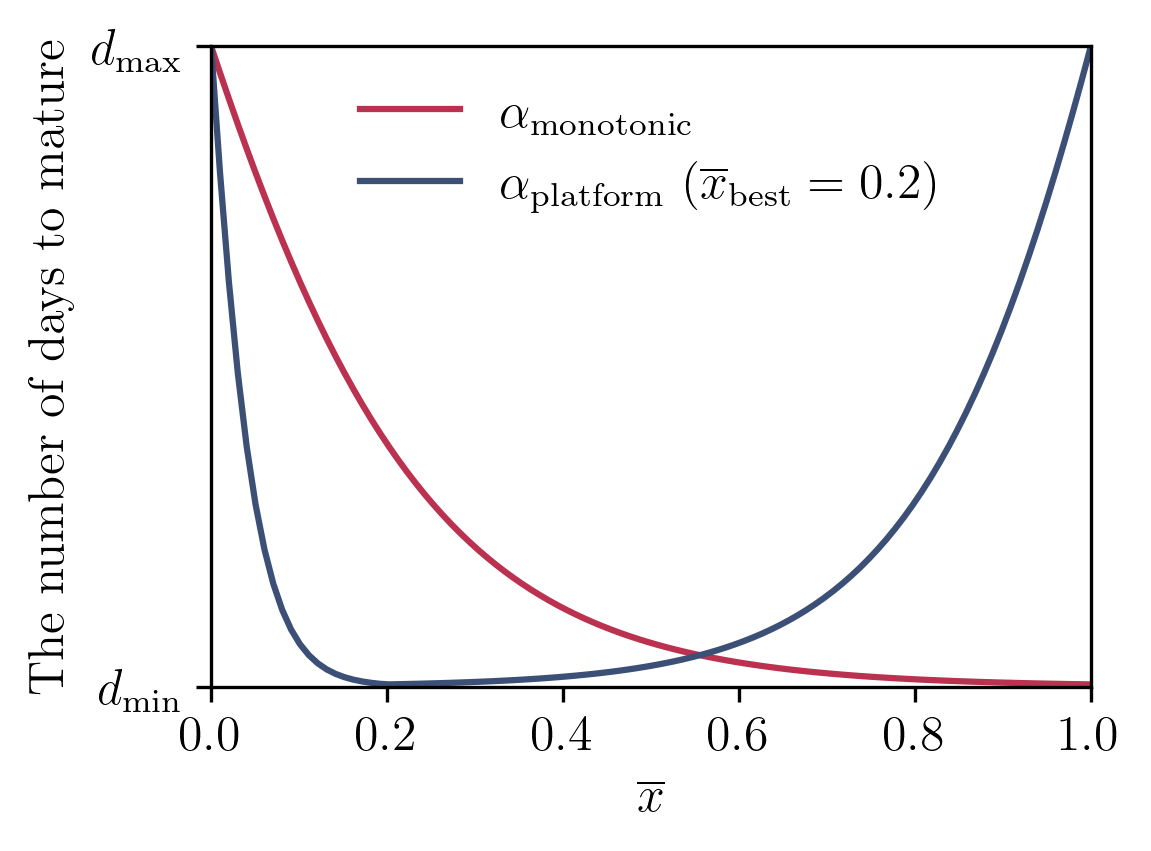

In [3]:
d_min = 69
d_max = 137
def mapping(x):
    return 1/d_max*(d_max/d_min)**x

plt.figure(dpi=300)
ax = plt.subplot(111)
x = np.linspace(0, 1, 100)
ax.plot(x, 1/mapping(monotonic_func(x)), label=r"$\alpha_{\mathrm{monotonic}}$", color="#BA324F")
ax.plot(x, 1/mapping(platform_func(x, x_best=0.2)), label=r"$\alpha_{\mathrm{platform}}\ (\overline{x}_{\mathrm{best}}=0.2)$", color="#3C4F76")
# ax.plot(np.ones(100)*0.2, np.linspace(0, 1, 100), color="grey", zorder=10, alpha=0.3)
# r"\alpha_{\text{monotonic}}"
# r"\alpha_{\text{platform}}\ (\overline{x}_{\text{best}=0.3)"
ax.legend(frameon=False)
ax.set_xlim([0,1])
ax.set_ylim([d_min,d_max])
ax.set_yticks([d_min,d_max])
ax.set_yticklabels([r"$d_{\mathrm{min}}$", r"$d_{\mathrm{max}}$"])
ax.set_xlabel(r"$\overline{x}$")
ax.set_ylabel("The number of days to mature")
plt.savefig("d_x.pdf", dpi=500)
plt.show()

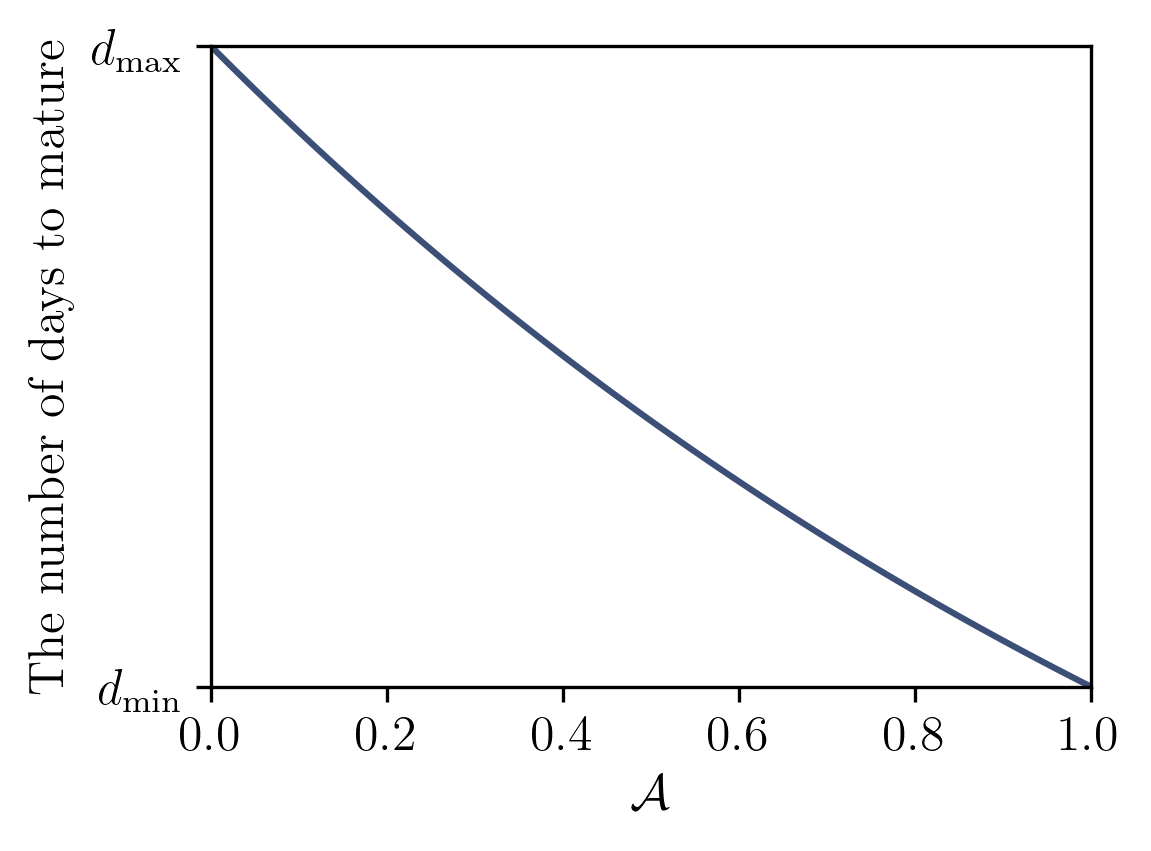

In [4]:
d_min = 69
d_max = 137
def mapping(x):
    return 1/d_max*(d_max/d_min)**x

plt.figure(dpi=300)
ax = plt.subplot(111)
x = np.linspace(0, 1, 100)
ax.plot(x, 1/mapping(x), color="#3C4F76")
ax.set_xlim([0,1])
ax.set_ylim([d_min,d_max])
ax.set_yticks([d_min,d_max])
ax.set_yticklabels([r"$d_{\mathrm{min}}$", r"$d_{\mathrm{max}}$"])
ax.set_xlabel(r"$\mathcal{A}$")
ax.set_ylabel("The number of days to mature")
plt.savefig("d_cal_A.pdf", dpi=500)
plt.show()